## Autor: Pablo Veloz
# Desafío - Naive Bayes 

__Descripción__
- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.
- Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
- Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

__Ejercicio 1: Preparar el ambiente de trabajo__
- Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
- Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import os
import glob
import aux_funciones as auxiliares

In [47]:
 glob.glob('Archivos para desafío/dump/*')

['Archivos para desafío/dump/bruce_springsteen_scrape.csv',
 'Archivos para desafío/dump/weezer_scrape.csv',
 'Archivos para desafío/dump/meshuggah_scrape.csv',
 'Archivos para desafío/dump/megadeth_scrape.csv',
 'Archivos para desafío/dump/the_beatles_scrape.csv',
 'Archivos para desafío/dump/raekwon_scrape.csv',
 'Archivos para desafío/dump/bob_dylan_scrape.csv',
 'Archivos para desafío/dump/mayhem_scrape.csv',
 'Archivos para desafío/dump/dr._dre_scrape.csv',
 'Archivos para desafío/dump/queen_scrape.csv',
 'Archivos para desafío/dump/vital_remains_scrape.csv',
 'Archivos para desafío/dump/mos_def_scrape.csv',
 'Archivos para desafío/dump/public_enemy_scrape.csv',
 'Archivos para desafío/dump/de_la_soul_scrape.csv',
 'Archivos para desafío/dump/metallica_scrape.csv',
 'Archivos para desafío/dump/michael_jackson_scrape.csv',
 'Archivos para desafío/dump/anthrax_scrape.csv',
 'Archivos para desafío/dump/kiss_scrape.csv',
 'Archivos para desafío/dump/cannibal_corpse_scrape.csv',
 'Arch

In [48]:
dataframes = list(map(lambda path: pd.read_csv(os.getcwd() + '/' + path), glob.glob('Archivos para desafío/dump/*')))
df = pd.concat(dataframes).drop(columns=['Unnamed: 0'])
df.columns = ['artist', 'genre', 'song', 'lyrics']
df.head()

,artist,genre,song,lyrics
0,Bruce Springsteen,rock,Blinded By The Light,Madman drummers bummers and Indians in the sum...
1,Bruce Springsteen,rock,Growin' Up,Well I stood stone-like at midnight \n Suspend...
2,Bruce Springsteen,rock,Mary Queen Of Arkansas,"Mary Queen of Arkansas, it's not too early for..."
3,Bruce Springsteen,rock,Does This Bus Stop At 82nd Street?,"Hey bus driver, keep the change \n Bless your ..."
4,Bruce Springsteen,rock,Lost In The Flood,The ragamuffin gunner is returnin' home like a...


In [49]:
df.shape

(9489, 4)

__Ejercicio 2: Descripción de los datos__
- Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
    - Comente sobre las principales tendencias.

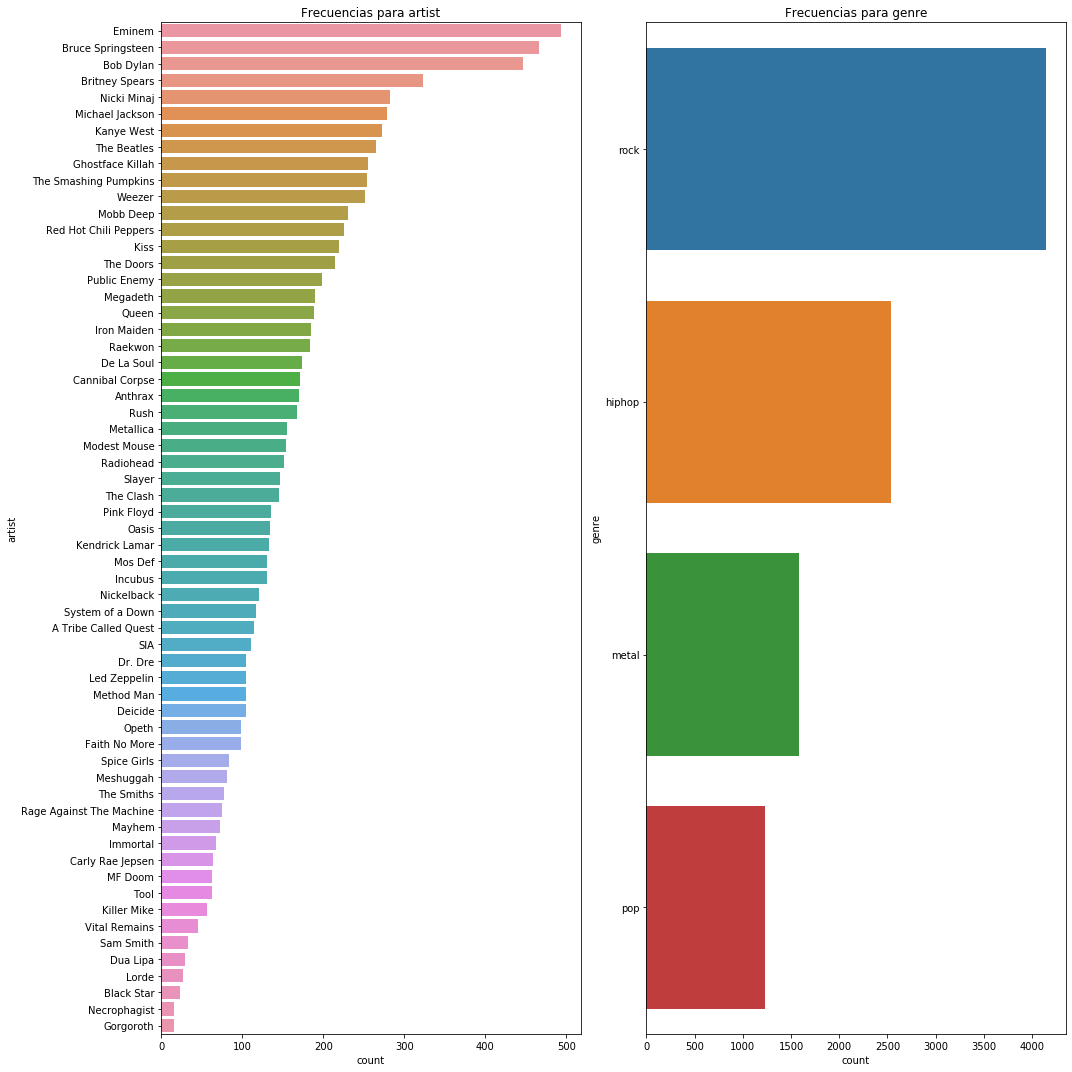

In [50]:
auxiliares.bar_counts(df,['artist', 'genre'],(1,2),(15,15))

__Comente sobre las principales tendencias__

- Los artistas con mayor cantidad de canciones:

In [51]:
df["artist"].value_counts().head(3)

Eminem               493
Bruce Springsteen    467
Bob Dylan            447
Name: artist, dtype: int64

- Las canciones están mayormente categorizadas con los estilos musicales rock y hiphop.
- El estilo Pop, tiene la menor cantidad de canciones asignadas.

__Ejercicio 3: Matriz de ocurrencias__
- Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la
librería sklearn . 
- Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
- Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
- Genere una función que replique el procedimiento para cada uno de los géneros.
- Comente sobre las principales características de cada género en cuanto a sus palabras.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyrics'])
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

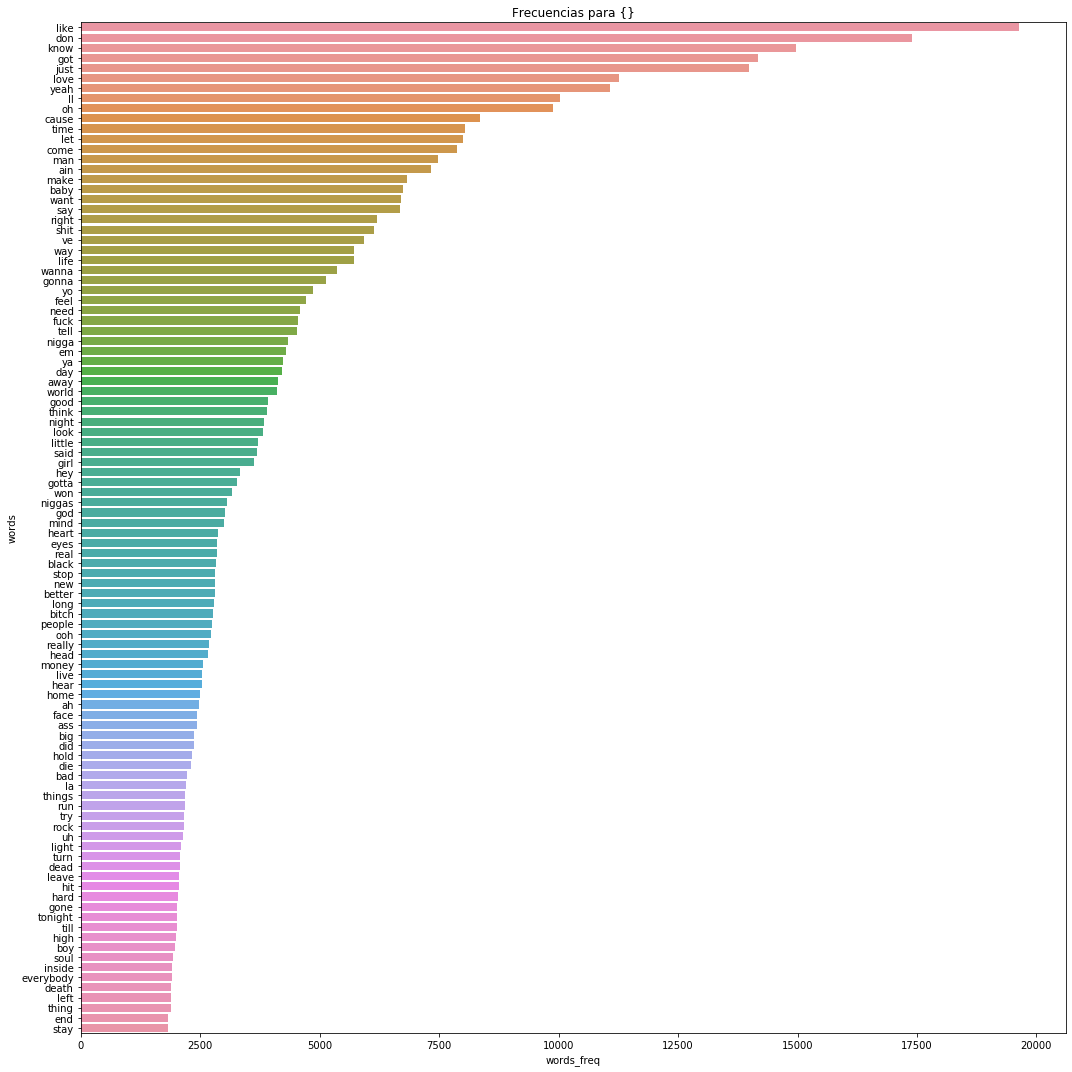

In [53]:
df2=pd.DataFrame(zip(words,words_freq),columns=["words","words_freq"])
df2=df2.sort_values(by=["words_freq"],ascending=False)
df2=df2.head(100)
plt.figure(figsize=(15, 15))
sns.barplot(y=df2['words'],x=df2['words_freq'])
plt.title('Frecuencias para {}')
plt.tight_layout()

In [54]:
def words_genre(df_consulta,estilo):
    
    
    from sklearn.feature_extraction.text import CountVectorizer
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(df_consulta)
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    df2=pd.DataFrame(zip(words,words_freq),columns=["words","words_freq"])
    
    df2=df2.sort_values(by=["words_freq"],ascending=False)
    df2=df2.head(100)
    plt.figure(figsize=(15, 15))
    sns.barplot(y=df2['words'],x=df2['words_freq'])
    plt.title(' Estilo '+ estilo)
    plt.tight_layout()

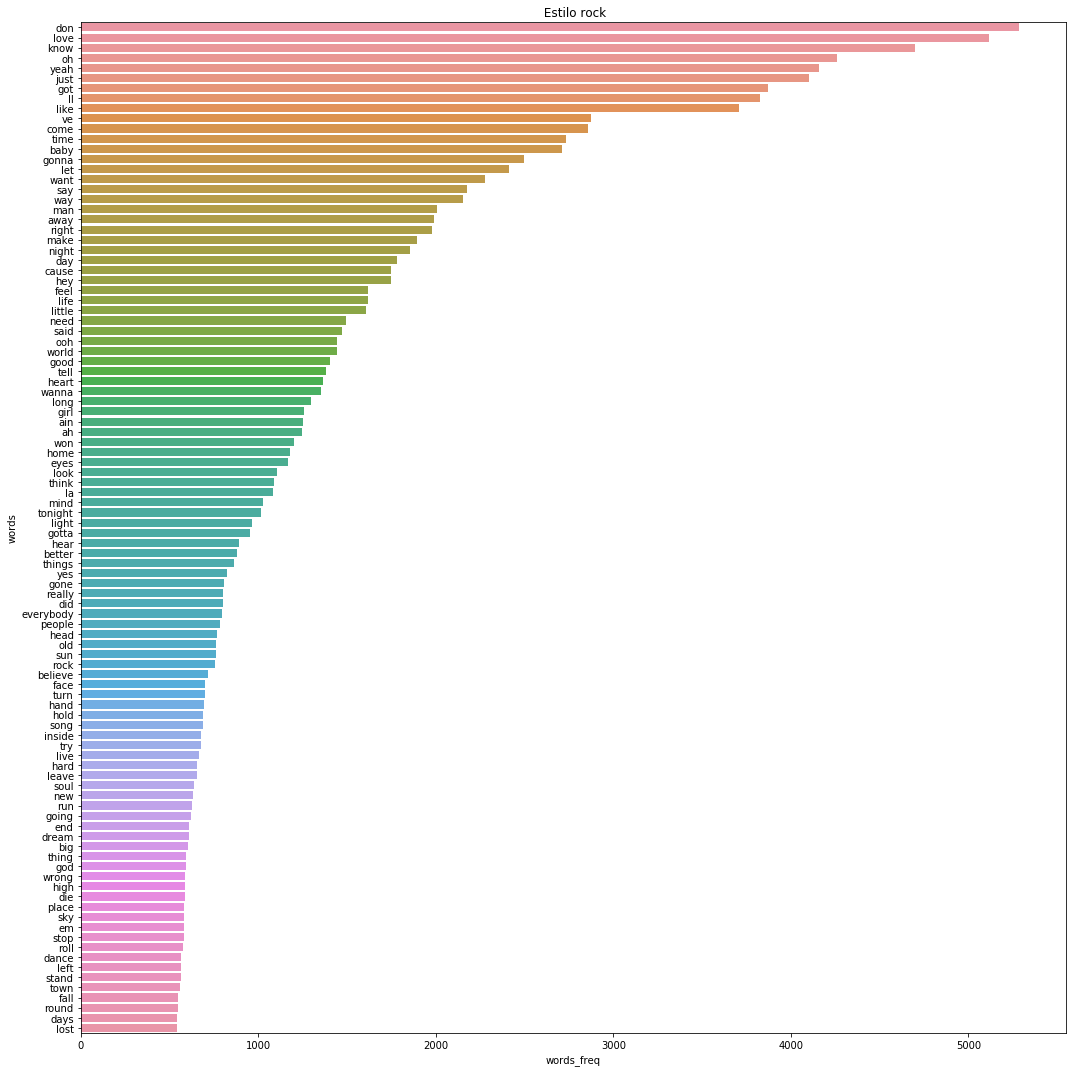

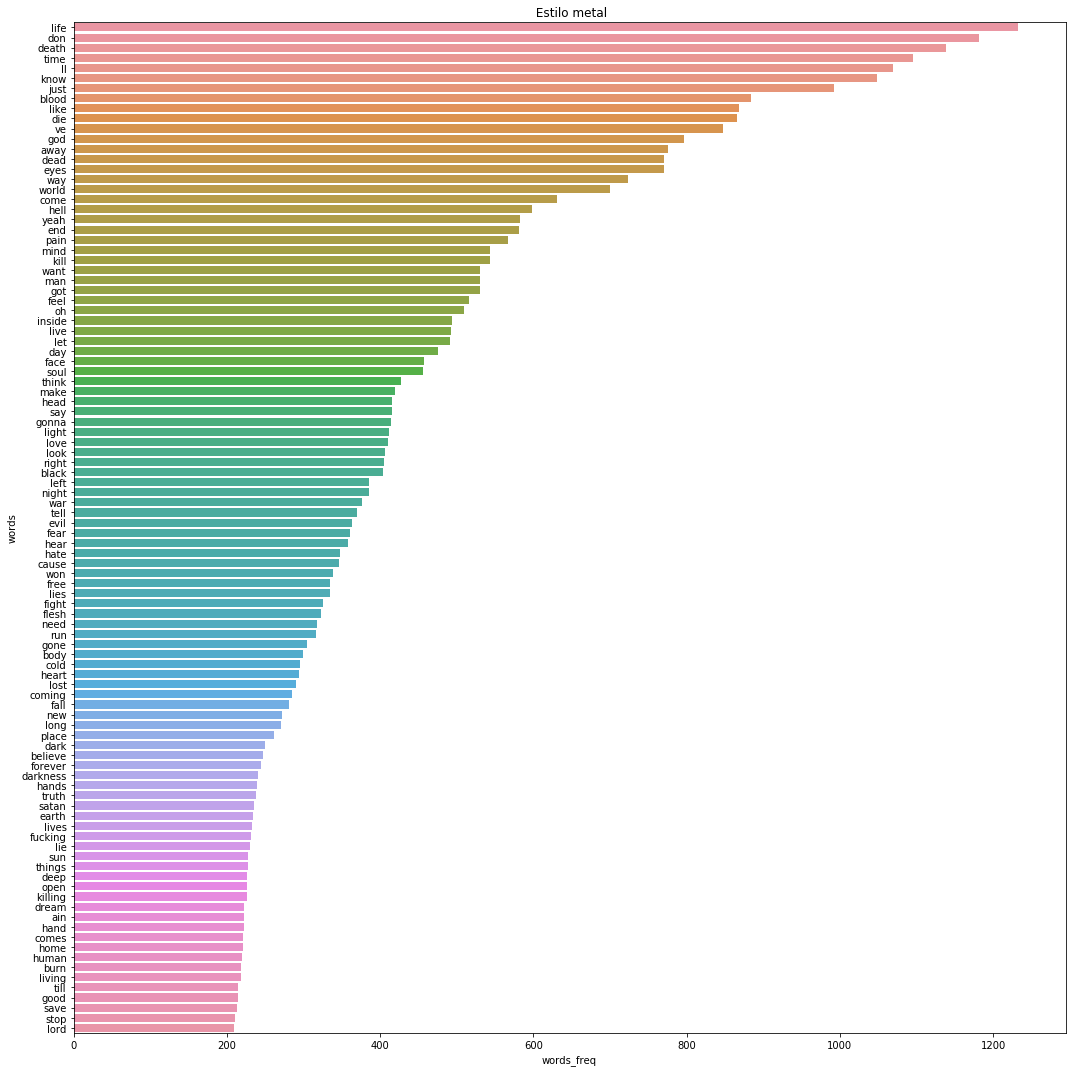

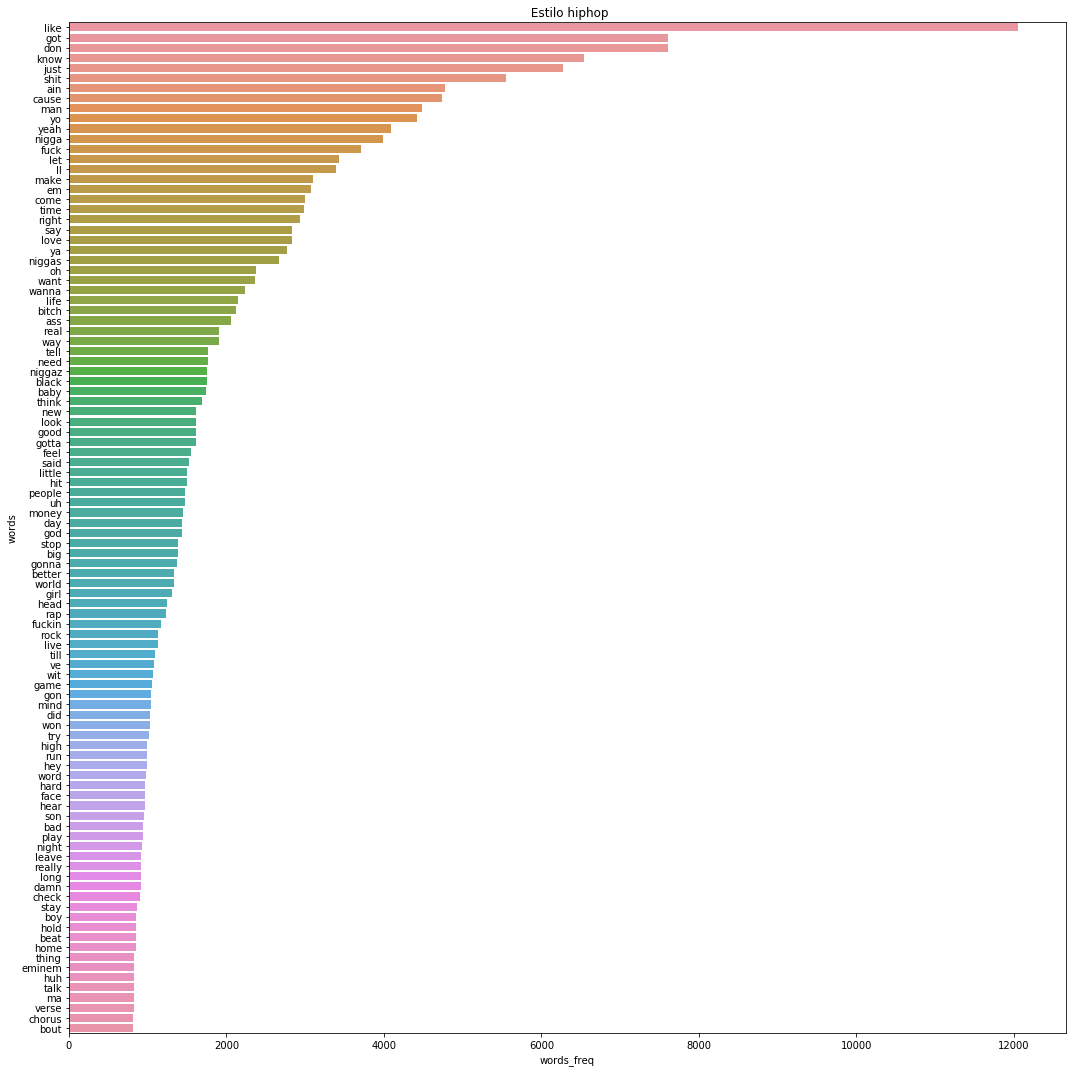

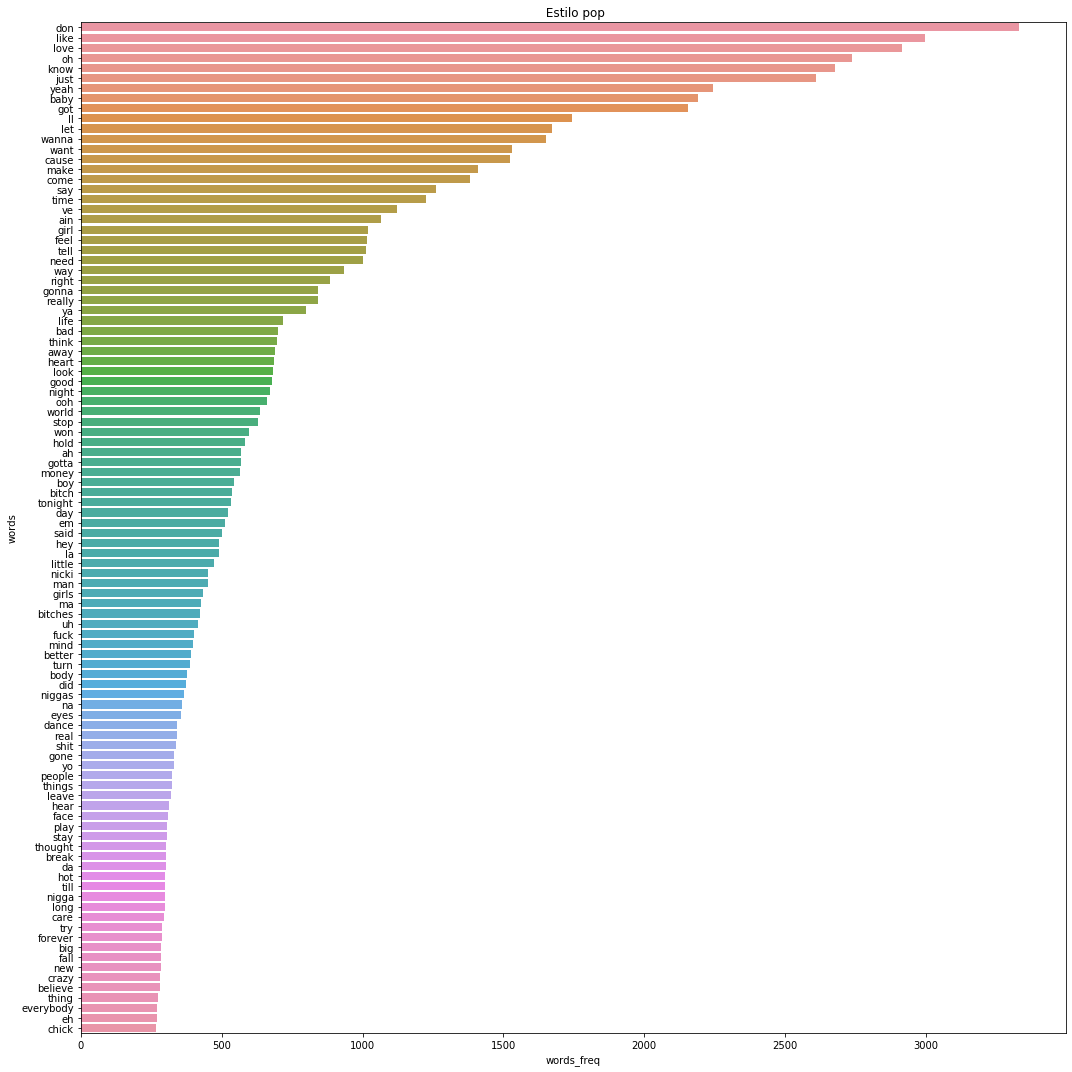

In [55]:
estilos=lista_estilos=df.genre.unique().tolist()
for i in range(len(estilos)):
    words_genre(df[df["genre"]==estilos[i]]["lyrics"],estilos[i])

In [56]:
def common_words_genre(df_consulta,estilo):
    from sklearn.feature_extraction.text import CountVectorizer
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(df_consulta)
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    df2=pd.DataFrame(zip(words,words_freq),columns=["words","words_freq"])
    df2["estilo"]=estilo
    df2=df2.sort_values(by=["words_freq"],ascending=False)
    df2=df2.head(3)
    return df2

In [57]:
estilos=df.genre.unique().tolist()
for i in range(len(estilos)):
    tmp=common_words_genre(df[df["genre"]==estilos[i]]["lyrics"],estilos[i])
    print(tmp)

      words  words_freq estilo
5282    don        5284   rock
10362  love        5114   rock
9697   know        4702   rock
      words  words_freq estilo
7883   life        1233  metal
4088    don        1181  metal
3284  death        1139  metal
      words  words_freq  estilo
18361  like       12055  hiphop
13533   got        7613  hiphop
9466    don        7604  hiphop
     words  words_freq estilo
3135   don        3329    pop
6219  like        2995    pop
6390  love        2914    pop


- Las palabras más comunes en los distintos generos corresponden a:
    - don-love-life-like
- Los generos rock y pop coinciden con las tres palabras más comunes.
- El estilo metal incluye la palabra death.
- El estilo hip hip la palabra got.

__Ejercicio 4: Entrenamiento del Modelo__




In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


y_vec=df["genre"]
X_mat=df["lyrics"]
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.4,random_state=1)
count_vectorizer=CountVectorizer(stop_words='english')
#count_vectorizer_fit = count_vectorizer.fit_transform(X_mat)
pipeline_model = Pipeline([('count',CountVectorizer(stop_words='english')),('model',MultinomialNB())])
#std_scaler=StandardScaler().fit(X_train)
#data_preproc_Xtrain=std_scaler.transform(X_train)
#data_preproc_Xtest=std_scaler.transform(X_test)


modelo1_entrenado=pipeline_model.fit(X_train,y_train)


In [59]:
canciones=['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game fortwo You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates', # IDLES - Mother
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]

### Los estilos musicales predichos son:

In [60]:
y_hat=modelo1_entrenado.predict(canciones)

In [61]:
for i in y_hat:
    print(i)

rock
metal
rock
hiphop
metal
rock


In [71]:
y_hat=modelo1_entrenado.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

      hiphop       0.88      0.94      0.91      1988
       metal       0.89      0.78      0.83      1268
         pop       0.88      0.45      0.60      1539
        rock       0.75      0.93      0.83      3323

    accuracy                           0.82      8118
   macro avg       0.85      0.77      0.79      8118
weighted avg       0.83      0.82      0.81      8118



__Matriz de Confusión__

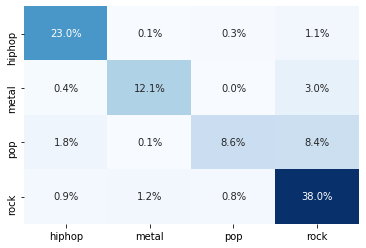

In [73]:
auxiliares.matriz_confusion(y_test,y_hat,pipeline_model)

Análisis:
- El Estilo __pop__:
    - Es el estilo musical con __menor__ predicciones correctas.
    - Sabemos que tiene alta precision y bajo recall, significa que hay muchas canciones que son pop que no reconoce.
- El Estilo __rock__ es el estilo musical con __mayor__ predicciones correctas.
- El modelo precice un __81.7%__ de manera correcta.

__Ejercicio 5: Mejora del Modelo__ 
- Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
- Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
- Comente sobre el desempeño general de éste.

- Al inspeccionar los generos:

In [74]:
df["genre"].value_counts('%')

rock      0.436295
hiphop    0.267151
metal     0.166719
pop       0.129835
Name: genre, dtype: float64

- El estilo musical Pop, es el que menor cantidad de datos posee. Una estrategia sería agregar más canciones de este estilo y de los que tienen las métricas más bajas.
- Inicialmente se trabajó con un dataframe de dimension (9489, 4)

### Agregando datos de la Segunda carpeta

In [81]:
dataframes2 = list(map(lambda path: pd.read_csv(os.getcwd() + '/' + path), glob.glob('Archivos para desafío/**/*')))
df_add = pd.concat(dataframes2).drop(columns=['Unnamed: 0'])
df_add.columns = ['artist', 'genre', 'song', 'lyrics']


In [82]:
print("Nuevas dimensiones dataframe: ",df_add.shape)

Nuevas dimensiones dataframe:  (20293, 4)


In [83]:
y_vec2 = df_add['genre']
X_mat2 = df_add['lyrics']
X_train, X_test, y_train, y_test, = train_test_split(X_mat2, y_vec2, test_size = 0.4, random_state = 2)
pipeline_model = Pipeline([('counter', CountVectorizer(stop_words='english')),
                            ('model', MultinomialNB())])
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.89      0.92      0.91      1988
       metal       0.88      0.78      0.83      1268
         pop       0.71      0.65      0.68      1539
        rock       0.80      0.85      0.83      3323

    accuracy                           0.82      8118
   macro avg       0.82      0.80      0.81      8118
weighted avg       0.82      0.82      0.82      8118



- Se observa que pop mejora levemente en precisión pero signficativamente en recall (casi al doble), por lo que reconoce mejor las canciones para este estilo musical.

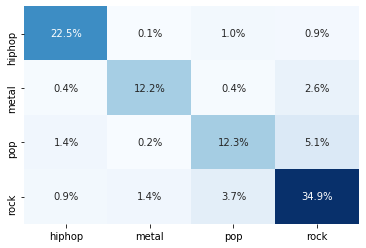

In [84]:
auxiliares.matriz_confusion(y_test,y_hat,pipeline_model)

Análisis:
- Al hacer este cambio, los estilos musicales que tenían peores métricas aumentan, en cambio, las de mejor desempeño disminuyen.
- El Estilo __pop__:
    - Paso de un 8.6% a un 12.3% .
    - Sabemos que tiene alta precision y bajo recall, significa que hay muchas canciones que son pop que no reconoce.
- El Estilo __rock__ permanece como el estilo musical con __mayor__ predicciones correctas.
- El modelo pasó de un __81.7%__ a __81,9%__ de predicción de manera correcta.

In [85]:
df_add["genre"].value_counts("%")

rock      0.408022
hiphop    0.249840
pop       0.186222
metal     0.155916
Name: genre, dtype: float64